In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

In [27]:
df = pd.read_csv("ground_truth_subjects.csv", header = None)


# Read CSV for training dataset
# Array file names
print(df)


# ground_truth -> file_name -> peizo signals

# ground_truth -> file_name -> breathrate

# ground_truth -> file_name -> heartrate

# ground_truth -> file_name -> jpeaks

# ground_truth -> file_name -> movementvalue




# Visualize (Plot graph) data

# Pattern / Algo
# Linear regression to get breathrate and heartrate and jpeaks (continuous)
####



# Classfier movementvalues
####

                      0
0  Subject39_1526417507
1  Subject39_1526591202
2  Subject42_1527280030
3  Subject43_1527806941
4  Subject54_1539288817
5  Subject55_1539459892


In [28]:
subjects = df[0].values

In [29]:
def get_file_paths(subjects):
    file_paths = []
    for subject in subjects:
        file_path1 = f"ground_truth/{subject}/{subject[10:]}.csv"
        file_path2 = f"ground_truth/{subject}/breathrates.csv"
        file_paths.append((file_path1, file_path2))
    return file_paths

In [30]:
file_paths = get_file_paths(subjects)

In [31]:
print(file_paths)

[('ground_truth/Subject39_1526417507/1526417507.csv', 'ground_truth/Subject39_1526417507/breathrates.csv'), ('ground_truth/Subject39_1526591202/1526591202.csv', 'ground_truth/Subject39_1526591202/breathrates.csv'), ('ground_truth/Subject42_1527280030/1527280030.csv', 'ground_truth/Subject42_1527280030/breathrates.csv'), ('ground_truth/Subject43_1527806941/1527806941.csv', 'ground_truth/Subject43_1527806941/breathrates.csv'), ('ground_truth/Subject54_1539288817/1539288817.csv', 'ground_truth/Subject54_1539288817/breathrates.csv'), ('ground_truth/Subject55_1539459892/1539459892.csv', 'ground_truth/Subject55_1539459892/breathrates.csv')]


In [34]:
X = np.array([[7], [8], [7], [4], [2], [7], [3], [8], [5]])
y = np.array([17, 16, 25, 67, 56, 87, 34, 54, 23])
model = LinearRegression()
model.fit(X, y)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [36]:
saved_model = pickle.load(open(filename, 'rb'))
saved_model.predict(np.array([[9]]))

array([34.80555556])

In [ ]:
interval = 6780
X = []
y = []

for X_file, y_file in file_paths:
    piezo_vals = pd.read_csv(X_file, header = None).iloc[:, 0:].values
    breathrates = pd.read_csv(y_file, header = None).iloc[:, 1].values
    
    X += list(piezo_vals)
    for breathrate in breathrates:
        y += list(np.random.normal(breathrate, 4, interval))

X = np.array(X)
y = np.array(y)

regressor = LinearRegression()
regressor.fit(piezo_0, y)

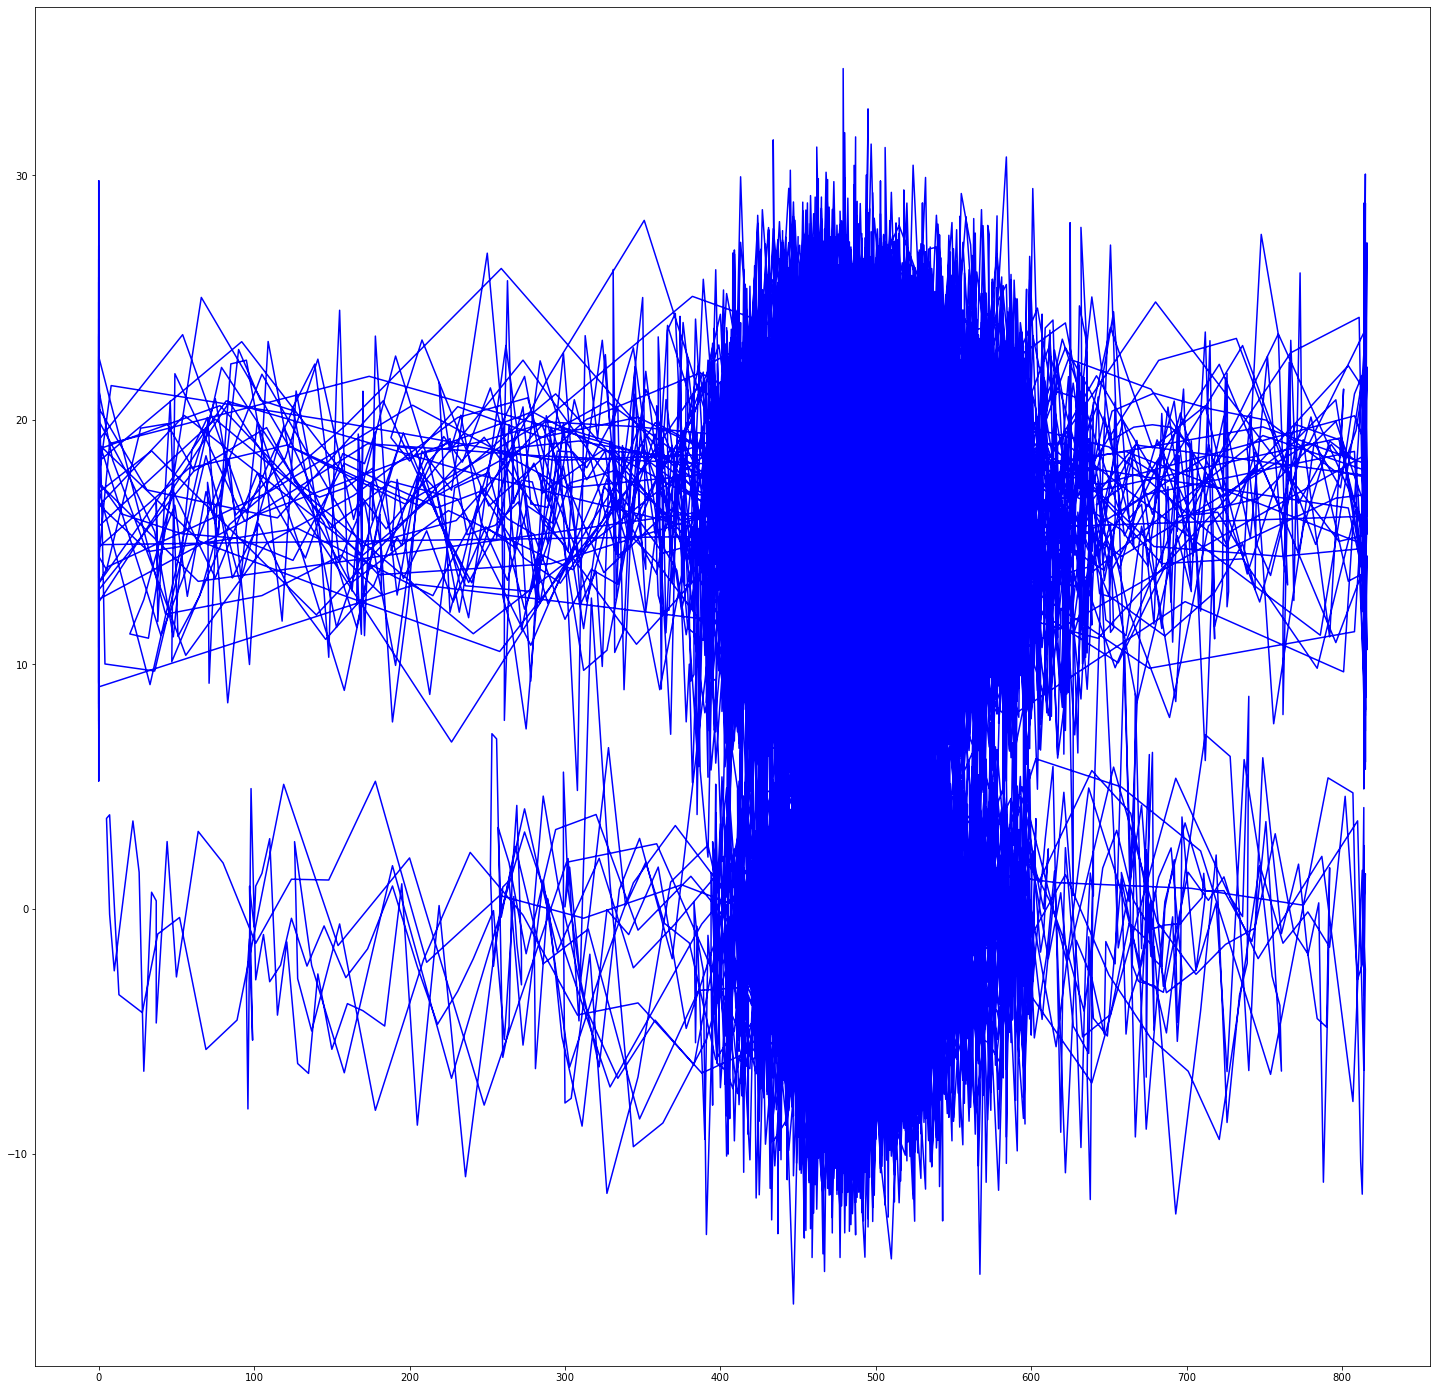

'n = (len(piezo_0) // 8)\ny = []\nfor breathrate in breathrates:\n    y += list(np.random.normal(breathrate, 4, n))\n    \ny = np.array([y])\npiezo_0 = [piezo_0]\n\nregressor = LinearRegression()\nregressor.fit(piezo_0, y)'

In [47]:
piezo_0 = pd.read_csv(file_paths[0][0], header = None).iloc[:, 0:].values
breathrates = pd.read_csv(file_paths[0][1], header = None).iloc[:, 1].values

interval = 6780
y = []
for breathrate in breathrates:
    y += list(np.random.normal(breathrate, 4, interval))
    
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)   
plt.plot(piezo_0, np.array(y), color = "blue")
plt.show()

"""n = (len(piezo_0) // 8)
y = []
for breathrate in breathrates:
    y += list(np.random.normal(breathrate, 4, n))
    
y = np.array([y])
piezo_0 = [piezo_0]

regressor = LinearRegression()
regressor.fit(piezo_0, y)"""

In [1]:
piezo_1 = pd.read_csv(file_paths[1][0], header = None)[0].values
piezo_1 = [piezo_1]
regressor.predict(piezo_1)

NameError: name 'pd' is not defined

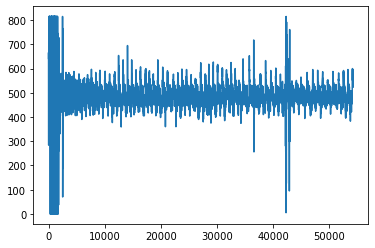

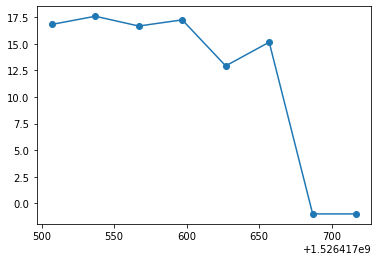

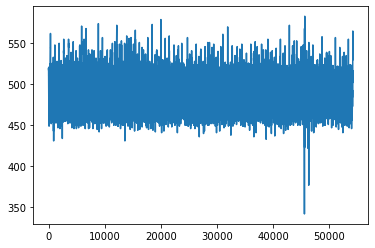

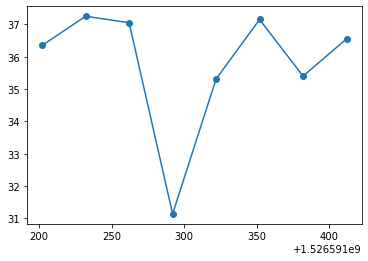

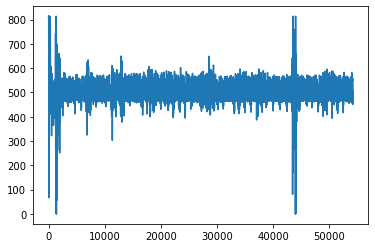

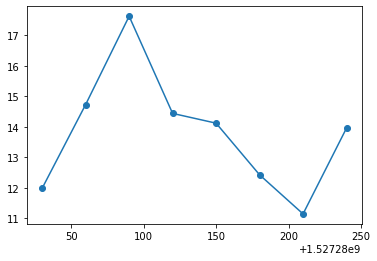

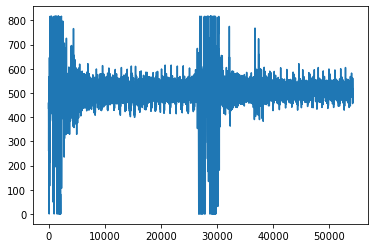

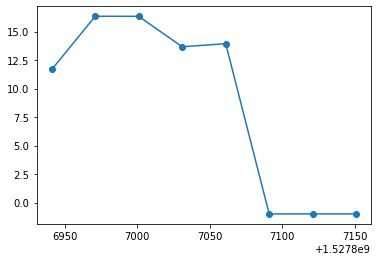

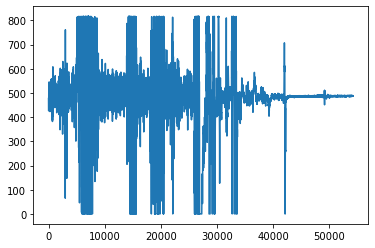

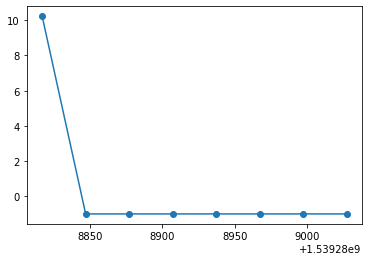

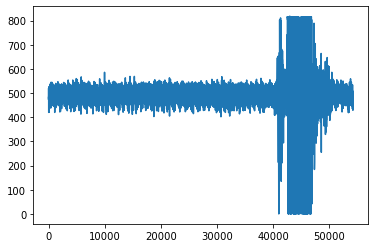

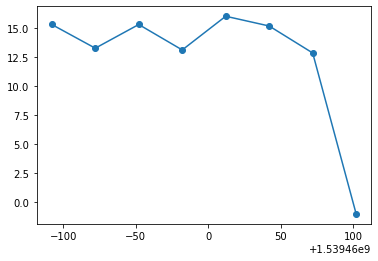

In [71]:
for file_path in file_paths:
    piezo_readings = pd.read_csv(file_path[0], header = None)[0].values
    breathrate_df = pd.read_csv(file_path[1], header = None)
    
    timestamps = breathrate_df[0].values
    breathrates = breathrate_df[1].values
    
    plt.plot(piezo_readings)
    plt.show()
    plt.plot(timestamps, breathrates, marker = 'o')
    plt.show()